#### ```import the requried Librarys```

In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\dataframe_ (1).csv")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


####  Perform exploratory data analysis

In [4]:
data.shape

(1697, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [6]:
# Check for missing values
data.isnull().sum()

input     1
output    1
dtype: int64

#### ```there are 1 nan value in each column```

In [7]:
# Drop duplicates based on a specific column
data.duplicated(subset=data.columns).sum()

606

In [8]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [29]:
data.dropna(inplace=True)

#### ```we drop a nan value```

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

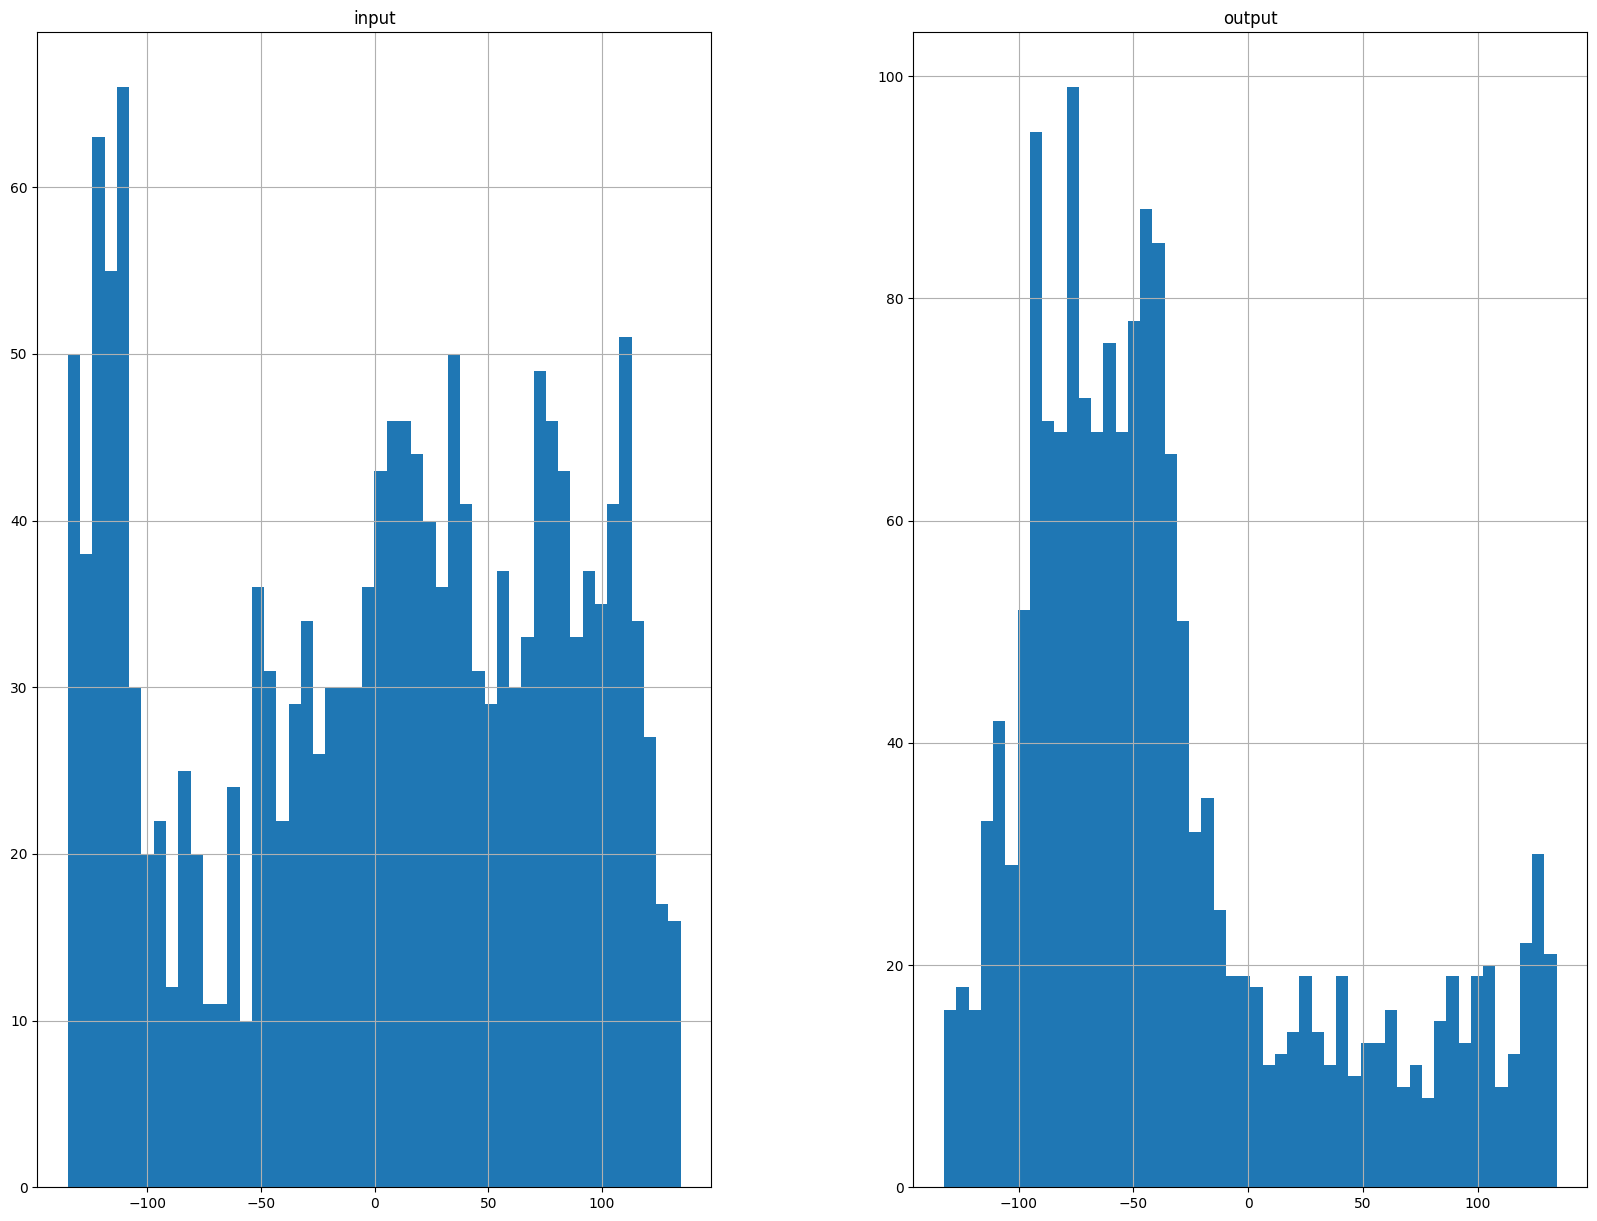

In [31]:
# Plot histograms of each feature to check the distribution
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: ylabel='Density'>

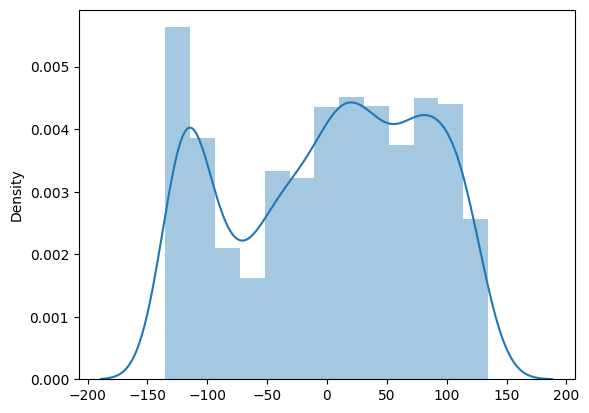

In [32]:
sns.distplot(data[['input']])

<AxesSubplot: ylabel='Density'>

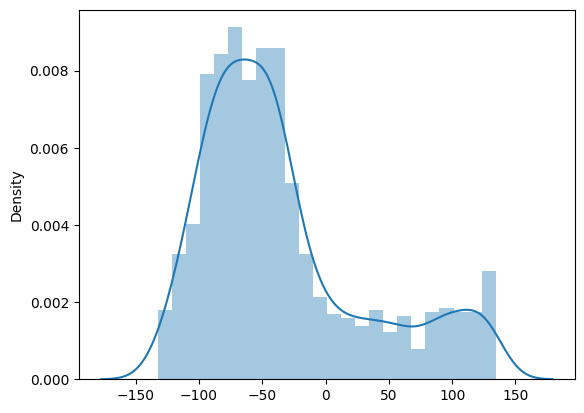

In [33]:
sns.distplot(data[['output']])

#### ```we find there is appropiet Normal distribtion.```

<AxesSubplot: xlabel='input'>

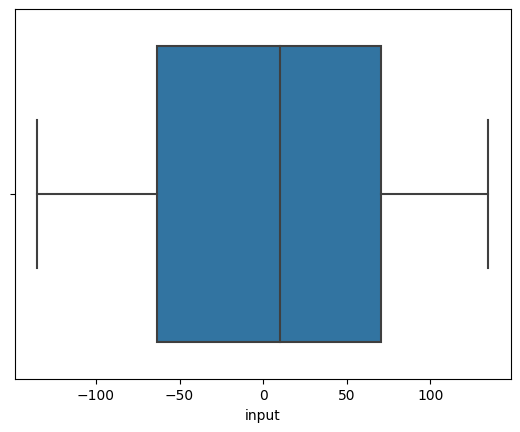

In [34]:
# Handle outliers
sns.boxplot(data['input'])

#### ```There is no outlier```

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [37]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=7)
X = data[["input"]]
X_poly = poly_features.fit_transform(X)

In [38]:
X_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
        -2.78575169e+10,  3.41925021e+12, -4.19681053e+14],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
        -2.65120220e+10,  3.22204366e+12, -3.91579539e+14],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
        -4.47026927e+10,  6.03115404e+12, -8.13705325e+14],
       ...,
       [ 1.00000000e+00,  3.16333313e+01,  1.00066765e+03, ...,
         3.16755853e+07,  1.00200428e+09,  3.16967335e+10],
       [ 1.00000000e+00,  2.90914577e+01,  8.46312913e+02, ...,
         2.08366270e+07,  6.06167855e+08,  1.76343065e+10],
       [ 1.00000000e+00,  1.71452960e+01,  2.93961173e+02, ...,
         1.48157940e+06,  2.54021172e+07,  4.35526818e+08]])

In [39]:
# Split the normalized data into training and testing sets
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

<AxesSubplot: xlabel='input', ylabel='output'>

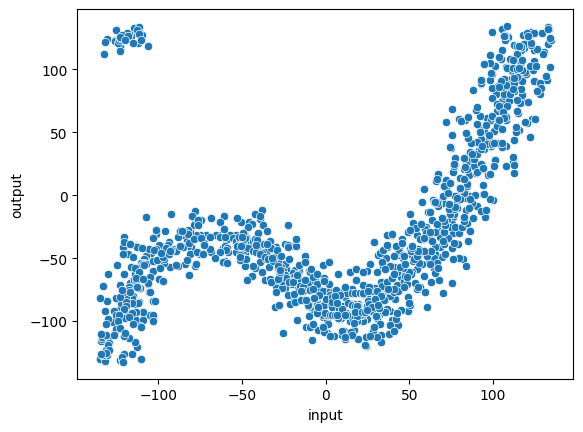

In [64]:
sns.scatterplot(data['input'],data['output'])

In [40]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Train the model
model = LinearRegression().fit(X_train, y_train)

In [42]:
# Predict the output on the test data
y_pred = model.predict(X_test)

In [27]:
#y_pred

In [43]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the target on the test data
y_pred = model.predict(X_test)

In [47]:
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
acc_r = r2_score(y_test, y_pred)

In [48]:
# Print the results
print("Mean Squared Error:", mse)
print("Accuracy For Poly Features:", acc_r)

Mean Squared Error: 1222.8699541971696
Accuracy For Poly Features: 0.7093143845543719


In [52]:
# Save the model using joblib

import joblib

joblib.dump(model,r"D:\Data Sets\ML Models\Hackathon.joblib")

['D:\\Data Sets\\ML Models\\Hackathon.joblib']

In [ ]:
🤞

#### ```decision tree```

In [49]:
# Split the normalized data into training and testing sets
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

In [50]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# build decision tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
# Predict the target on the test data
y_pred = model.predict(X_test)

In [53]:
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
acc_DT = r2_score(y_test, y_pred)

In [62]:
# Print the results
print("Mean Squared Error:", mse)
print("Accuracy of DT:", acc_DT)

Mean Squared Error: 1161.767538154422
Accuracy of DT: 0.6855829186866984


#### ```SVR```

In [55]:
from sklearn.svm import SVR

In [56]:
# Split the normalized data into training and testing sets
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

In [57]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# build SVM model
svm_reg = SVR()
svm_reg.fit(X_train, y_train)


SVR()

In [59]:
# Predict the target on the test data
y_pred = model.predict(X_test)

In [60]:
# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
acc_SVR = r2_score(y_test, y_pred)

In [61]:
# Print the results
print("Mean Squared Error:", mse)
print("Accuracy of SVR:", acc_SVR)

Mean Squared Error: 1161.767538154422
Accuracy of SVR: 0.719898464001786


#### ALL THE MODELS AND THERE ACCURACY

In [71]:
results = pd.DataFrame([[acc_r,acc_DT,acc_SVR]],columns=['LR',"DT","SVM"])

In [72]:
results

,LR,DT,SVM
0,0.709314,0.685583,0.719898


In [ ]:
🤞